In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

In [97]:
data=pd.read_csv('/content/House_Pricing.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [36]:
data.shape

(21613, 21)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [99]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [39]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [40]:
data["No of Times Visited"].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [41]:
data['Sale Price'].unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [42]:
data['Date House was Sold'].unique()

array(['14 October 2017', '14 December 2017', '15 February 2016',
       '14 May 2017', '14 June 2017', '15 January 2016', '15 April 2016',
       '15 March 2016', '14 July 2017', '14 August 2017',
       '14 November 2017', '14 September 2017', '15 May 2016'],
      dtype=object)

In [43]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [ ]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['No of Bathrooms'].mode()

0    2.5
Name: No of Bathrooms, dtype: float64

In [17]:
data['Zipcode'].mode()

0    98115.0
Name: Zipcode, dtype: float64

In [18]:
data['Longitude'].mode()

0   -122.29
Name: Longitude, dtype: float64

In [44]:
data.drop(columns=['No of Times Visited'],inplace=True)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


<Axes: xlabel='Sale Price', ylabel='Count'>

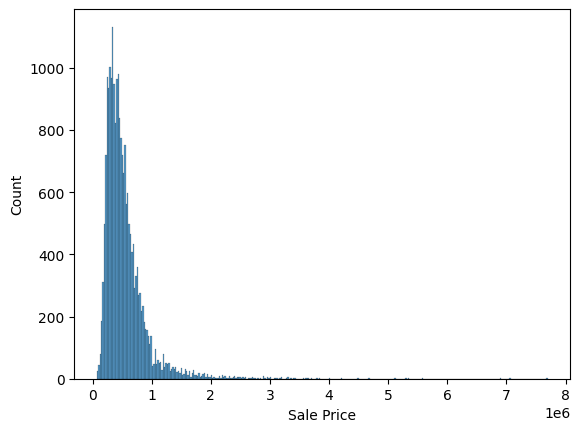

In [ ]:
sns.histplot(data['Sale Price'])

<Axes: xlabel='No of Bathrooms', ylabel='Count'>

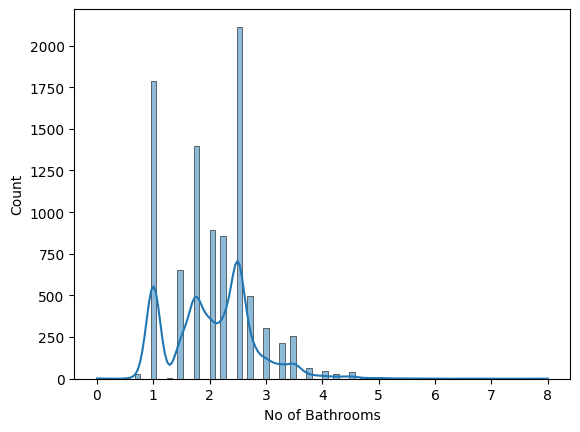

In [22]:
sns.histplot(data['No of Bathrooms'], kde=True)

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

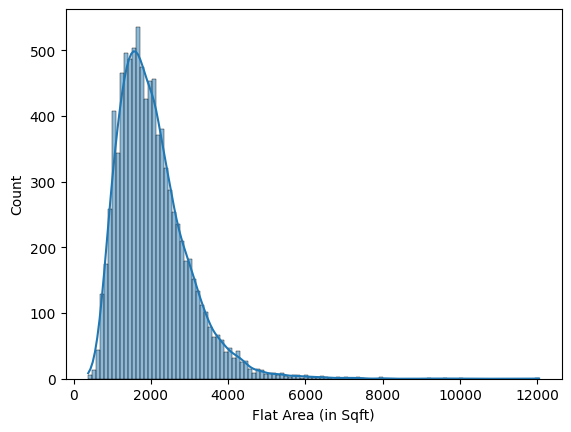

In [23]:
sns.histplot(data['Flat Area (in Sqft)'], kde=True)

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

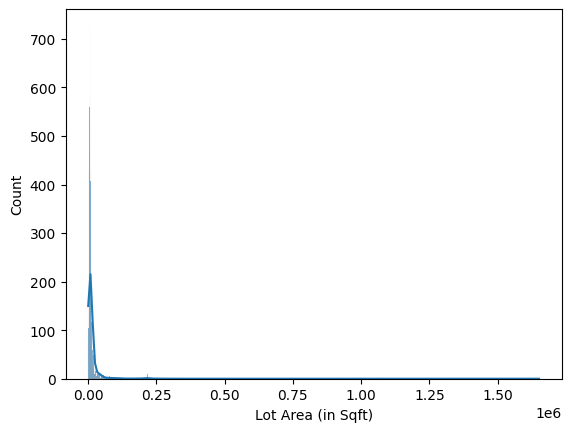

In [26]:
sns.histplot(data['Lot Area (in Sqft)'], kde=True)

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

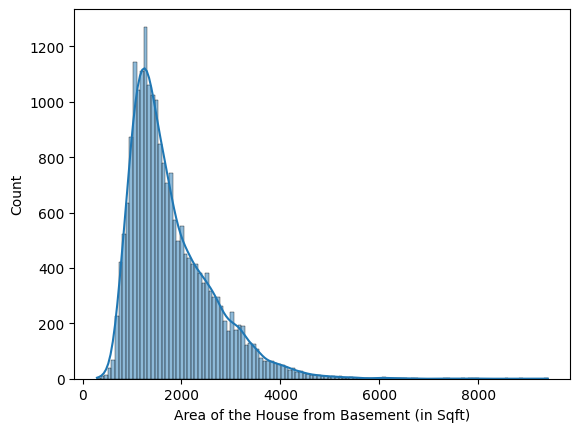

In [51]:
sns.histplot(data['Area of the House from Basement (in Sqft)'], kde=True)

<Axes: xlabel='Living Area after Renovation (in Sqft)', ylabel='Count'>

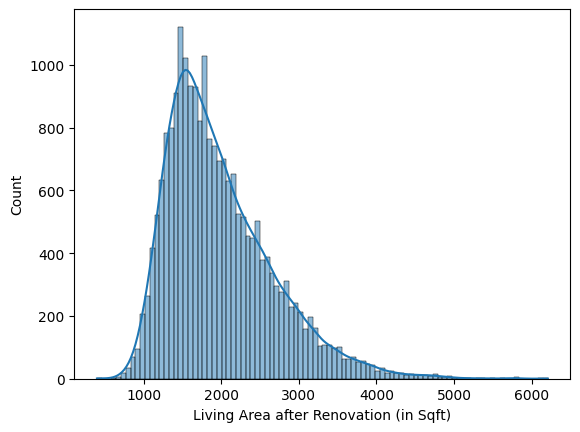

In [52]:
sns.histplot(data['Living Area after Renovation (in Sqft)'], kde=True)

In [53]:
data['Sale Price'].fillna(data['Sale Price'].mean(),inplace=True)
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mean(),inplace=True)
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mode()[0],inplace=True)
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mean(),inplace=True)
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mean(),inplace=True)
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mean(),inplace=True)


data.isnull().sum()


ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

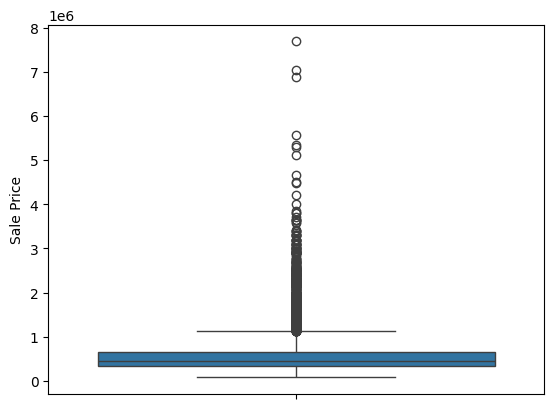

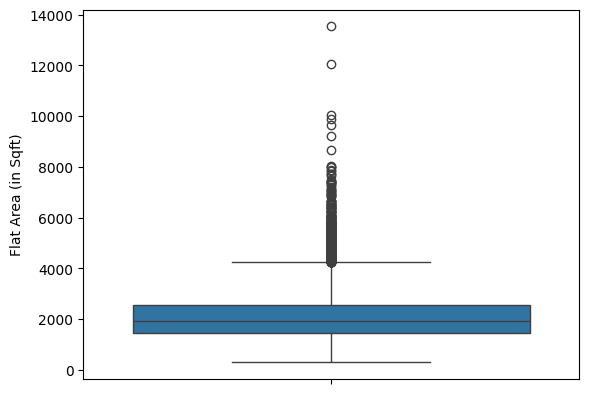

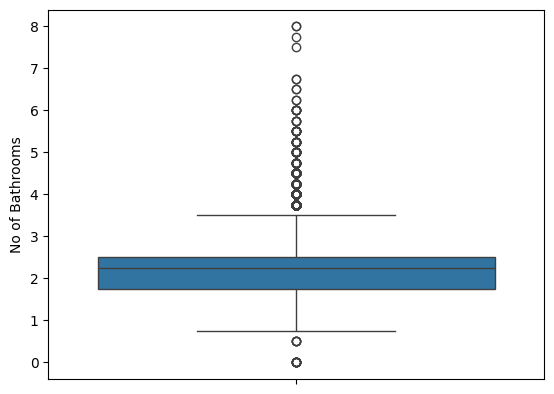

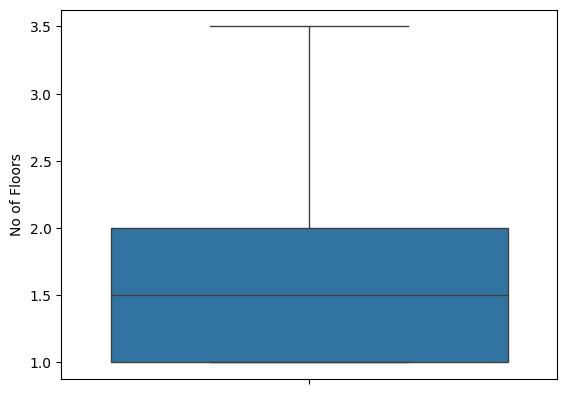

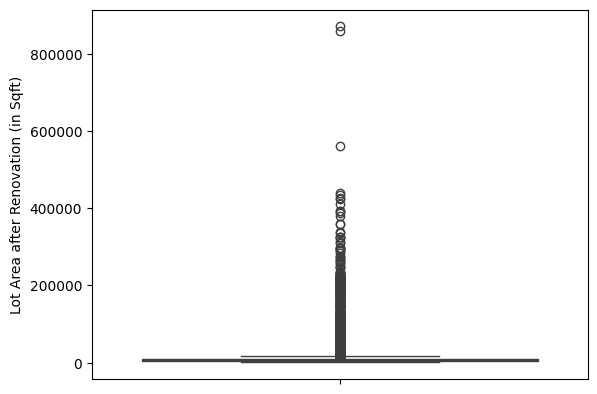

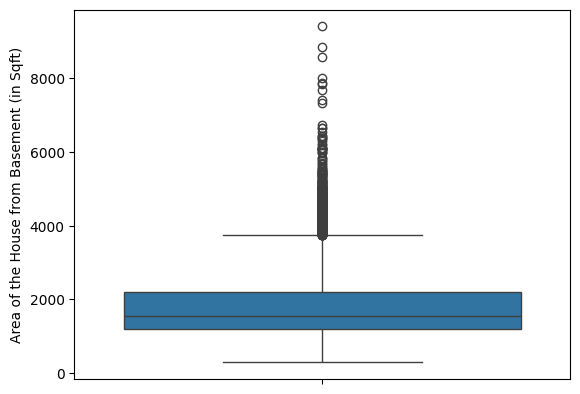

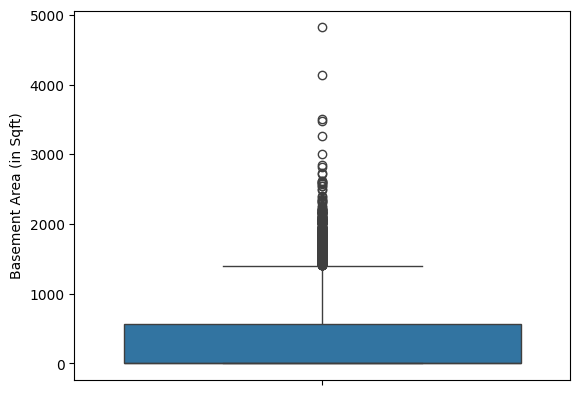

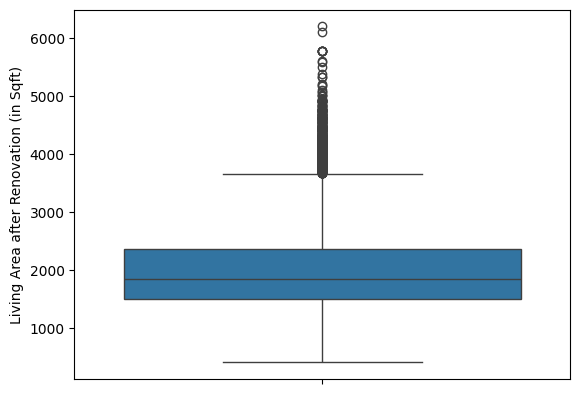

In [50]:
import matplotlib.pyplot as plt
outliers_columns = ['Sale Price','Flat Area (in Sqft)','No of Bathrooms','No of Floors','Lot Area after Renovation (in Sqft)','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Living Area after Renovation (in Sqft)']
for col in outliers_columns:
  plt.figure()
  sns.boxplot(data[col])


In [54]:
Q1 = np.percentile(data['Sale Price'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['Sale Price'], 50,interpolation = 'midpoint')
Q3 = np.percentile(data['Sale Price'], 75,interpolation = 'midpoint')
print(Q1)
print(q2)
print(Q3)

322000.0
450000.0
645000.0


In [55]:
iqr = Q3 - Q1
print(iqr)

323000.0


In [56]:
min = Q1 - (1.5 * iqr)
max = Q3 + (1.5 * iqr)
print(min)
print(max)

-162500.0
1129500.0


In [57]:
outliers=[]
for x in data['Sale Price']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[1230000.0, 2000000.0, 1350000.0, 1330000.0, 1450000.0, 2250000.0, 1510000.0, 2400000.0, 2900000.0, 1370000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1200000.0, 1150000.0, 1390000.0, 1280000.0, 1200000.0, 1490000.0, 2250000.0, 1600000.0, 2130000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1150000.0, 1480000.0, 1580000.0, 1300000.0, 1310000.0, 2250000.0, 1360000.0, 1220000.0, 2400000.0, 1270000.0, 1200000.0, 1320000.0, 2450000.0, 1240000.0, 1570000.0, 1130000.0, 1200000.0, 1280000.0, 1960000.0, 1750000.0, 5110000.0, 1150000.0, 1880000.0, 1230000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1130000.0, 1180000.0, 1700000.0, 1400000.0, 2540000.0, 1360000.0, 1230000.0, 5350000.0, 1330000.0, 1220000.0, 1250000.0, 1300000.0, 1180000.0, 1380000.0, 1150000.0, 1200000.0, 2250000.0, 1230000.0, 1270000.0, 1680000.0, 1930000.0, 1180000.0, 2350000.0, 1140000.0, 1320000.0, 1430000.0, 1530000.0, 1570000.0, 1130000.0

In [63]:
# Replace min_value and max_value with the calculated min and max from your previous cell
data['Sale Price'] = data['Sale Price'].clip(min, max)

In [100]:
q1 = np.percentile(data['Flat Area (in Sqft)'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['Flat Area (in Sqft)'], 50,interpolation = 'midpoint')
q3 = np.percentile(data['Flat Area (in Sqft)'], 75,interpolation = 'midpoint')
print(q1)
print(q2)
print(q3)

nan
nan
nan


In [65]:
iqr = q3 - q1
print(iqr)

1120.0


In [66]:
min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)
print(min)
print(max)

-250.0
4230.0


In [67]:
outliers=[]
for x in data['Flat Area (in Sqft)']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[5420.0, 4770.0, 4380.0, 5180.0, 4410.0, 5050.0, 5310.0, 4550.0, 4290.0, 4290.0, 4800.0, 6070.0, 4870.0, 4860.0, 4860.0, 4410.0, 4760.0, 6050.0, 4740.0, 5403.0, 4380.0, 4640.0, 6050.0, 4370.0, 4570.0, 4670.0, 4860.0, 4270.0, 4890.0, 4390.0, 4250.0, 5670.0, 4475.0, 6070.0, 4300.0, 4390.0, 8010.0, 4460.0, 4610.0, 4380.0, 4250.0, 4930.0, 7390.0, 4640.0, 5320.0, 8000.0, 6563.0, 4740.0, 5450.0, 4440.0, 4830.0, 4280.0, 4570.0, 4370.0, 5710.0, 5620.0, 5774.0, 4470.0, 4490.0, 5040.0, 5770.0, 5180.0, 6400.0, 4490.0, 6055.0, 4250.0, 6300.0, 4350.0, 4460.0, 4340.0, 4250.0, 5110.0, 4700.0, 4910.0, 4750.0, 6840.0, 4930.0, 5180.0, 5130.0, 6640.0, 5740.0, 7350.0, 4510.0, 4300.0, 4870.0, 5020.0, 4740.0, 5370.0, 4860.0, 6930.0, 6550.0, 6110.0, 4883.0, 5010.0, 4660.0, 4600.0, 4910.0, 5410.0, 4270.0, 4520.0, 5340.0, 5230.0, 5370.0, 4730.0, 4430.0, 5780.0, 6240.0, 10040.0, 4250.0, 5360.0, 4610.0, 7480.0, 5620.0, 4340.0, 7080.0, 5760.0, 4400.0, 4280.0, 9200.0, 4320.0, 4420.0, 4380.0, 4580.0, 5310.0, 4660.0

In [68]:
data['Flat Area (in Sqft)'] = data['Flat Area (in Sqft)'].clip(min, max)

In [101]:
q1 = np.percentile(data['No of Bathrooms'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['No of Bathrooms'], 50,interpolation = 'midpoint')
q3 = np.percentile(data['No of Bathrooms'], 75,interpolation = 'midpoint')
print(q1)
print(q2)
print(q3)

nan
nan
nan


In [70]:
iqr = q3 - q1
print(iqr)

0.75


In [71]:
min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)
print(min)
print(max)

0.625
3.625


In [72]:
outliers=[]
for x in data['No of Bathrooms']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[4.5, 4.0, 4.0, 4.75, 5.0, 4.25, 4.5, 4.25, 3.75, 5.0, 4.0, 4.0, 4.25, 4.25, 0.0, 4.25, 4.5, 4.5, 3.75, 4.5, 4.0, 0.0, 4.5, 5.25, 4.0, 3.75, 4.5, 4.5, 4.25, 6.0, 3.75, 4.25, 4.0, 3.75, 3.75, 4.75, 5.0, 3.75, 3.75, 3.75, 5.0, 4.25, 3.75, 4.0, 4.25, 4.5, 3.75, 4.0, 3.75, 5.0, 3.75, 4.0, 3.75, 3.75, 4.25, 4.0, 4.25, 4.25, 4.5, 3.75, 4.0, 3.75, 5.0, 3.75, 0.5, 4.0, 5.0, 5.0, 4.5, 5.5, 4.25, 4.0, 4.5, 3.75, 3.75, 4.5, 3.75, 5.5, 4.25, 5.5, 0.0, 5.25, 4.25, 4.0, 4.5, 3.75, 3.75, 3.75, 3.75, 4.25, 4.5, 4.75, 3.75, 3.75, 3.75, 3.75, 3.75, 4.5, 4.25, 4.0, 4.75, 4.75, 3.75, 4.5, 4.0, 3.75, 3.75, 4.0, 4.0, 3.75, 4.75, 4.5, 3.75, 6.75, 6.0, 4.5, 5.5, 4.5, 3.75, 4.0, 4.25, 3.75, 5.75, 3.75, 4.0, 4.0, 4.0, 5.25, 4.75, 4.0, 4.25, 3.75, 4.0, 4.0, 5.25, 3.75, 3.75, 3.75, 4.5, 5.0, 3.75, 3.75, 4.5, 4.0, 3.75, 3.75, 4.0, 4.75, 3.75, 0.0, 4.25, 5.0, 3.75, 4.0, 4.25, 4.0, 4.0, 4.5, 4.75, 4.0, 4.0, 4.0, 4.5, 3.75, 3.75, 4.5, 5.75, 4.75, 3.75, 4.0, 4.0, 3.75, 4.25, 4.25, 3.75, 0.0, 4.5, 5.5, 4.0, 4.5, 4.5, 4

In [73]:
data['No of Bathrooms'] = data['No of Bathrooms'].clip(min, max)

In [74]:
q1= np.percentile(data['No of Floors'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['No of Floors'], 50,interpolation = 'midpoint')
q3 = np.percentile(data['No of Floors'], 75,interpolation = 'midpoint')
print(q1)
print(q2)
print(q3)

1.0
1.5
2.0


In [75]:
iqr = q3 - q1
print(iqr)

1.0


In [77]:
outliers=[]
for x in data['No of Floors']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[]


In [79]:
data['Basement Area (in Sqft)'] = data['Basement Area (in Sqft)'].clip(min, max)

In [80]:
q1 = np.percentile(data['Living Area after Renovation (in Sqft)'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['Living Area after Renovation (in Sqft)'], 50,interpolation = 'midpoint')
q3 = np.percentile(data['Living Area after Renovation (in Sqft)'], 75,interpolation = 'midpoint')
print(q1)
print(q2)
print(q3)

1490.0
1840.0
2360.0


In [81]:
iqr = q3 - q1
print(iqr)

870.0


In [82]:
outliers=[]
for x in data['Living Area after Renovation (in Sqft)']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[1340.0, 1690.0, 2720.0, 1360.0, 1800.0, 4760.0, 2238.0, 1650.0, 1780.0, 2390.0, 2210.0, 1330.0, 1780.0, 1370.0, 1360.0, 2140.0, 1890.0, 1610.0, 1060.0, 1280.0, 1400.0, 4110.0, 2240.0, 1220.0, 2200.0, 1030.0, 1760.0, 1860.0, 1520.0, 2630.0, 2580.0, 1390.0, 1460.0, 1570.0, 2020.0, 1590.0, 2160.0, 1730.0, 1290.0, 2620.0, 2470.0, 2410.0, 3625.0, 1580.0, 1340.0, 3050.0, 1228.0, 2680.0, 970.0, 2680.0, 1190.0, 1990.0, 1410.0, 1480.0, 2730.0, 1950.0, 2250.0, 2690.0, 2960.0, 2270.0, 2570.0, 1290.0, 2500.0, 1580.0, 1440.0, 1440.0, 2750.0, 2221.0, 1010.0, 3390.0, 3530.0, 1640.0, 1510.0, 2420.0, 1940.0, 3240.0, 1680.0, 890.0, 1130.0, 3350.0, 2350.0, 1870.0, 1720.0, 1850.0, 1570.0, 2020.0, 1590.0, 1900.0, 1950.0, 1030.0, 1980.0, 2520.0, 1350.0, 1570.0, 1570.0, 1950.0, 1750.0, 1160.0, 1650.0, 2550.0, 2200.0, 1610.0, 2570.0, 2370.0, 1640.0, 2250.0, 1240.0, 1270.0, 2990.0, 2500.0, 1940.0, 1380.0, 1540.0, 2090.0, 2640.0, 1830.0, 1620.0, 1190.0, 1880.0, 1610.0, 2340.0, 1580.0, 1710.0, 1850.0, 2700.0, 3

In [83]:
data['Area of the House from Basement (in Sqft)'] = data['Area of the House from Basement (in Sqft)'].clip(min, max)

In [84]:
q1 = np.percentile(data['Lot Area (in Sqft)'], 25,interpolation = 'midpoint')
q2 = np.percentile(data['Lot Area (in Sqft)'], 50,interpolation = 'midpoint')
q3 = np.percentile(data['Lot Area (in Sqft)'], 75,interpolation = 'midpoint')
print(q1)
print(q2)
print(q3)

5040.0
7620.0
10701.0


In [95]:
iqr = q3 - q1
print(iqr)

5661.0


In [86]:
min = q1 - (1.5 * iqr)
max = q3 + (1.5 * iqr)
print(min)
print(max)

-3451.5
19192.5


In [87]:
outliers=[]
for x in data['Lot Area (in Sqft)']:
  if((x>max) or (x<min)):
    outliers.append(x)
print(outliers)

[101930.0, 19901.0, 44867.0, 34848.0, 24186.0, 65005.0, 21235.0, 20158.0, 50094.0, 50529.0, 35102.0, 39683.0, 41800.0, 36847.0, 107593.0, 33919.0, 28037.0, 111078.0, 315374.0, 60984.0, 19850.0, 25245.0, 38332.0, 21000.0, 35003.0, 66211.0, 155073.0, 33474.0, 19436.0, 28040.0, 94300.0, 221284.0, 36224.0, 40510.0, 20100.0, 57346.0, 26300.0, 49375.0, 22111.0, 78408.0, 64904.0, 45004.0, 43995.0, 20000.0, 32633.0, 19800.0, 77972.0, 29970.0, 40438.0, 69415.0, 209959.0, 26977.0, 25600.0, 22357.0, 40139.0, 143947.0, 32239.0, 37461.0, 174240.0, 171626.0, 27260.0, 19700.0, 219978.0, 24920.0, 20978.0, 28025.0, 181319.0, 19635.0, 57063.0, 39150.0, 194278.0, 230652.0, 36947.0, 76230.0, 24069.0, 40518.0, 29242.0, 29170.0, 108900.0, 217014.0, 22370.0, 75794.0, 84942.0, 217800.0, 32666.0, 31465.0, 34293.0, 26326.0, 36400.0, 55867.0, 22267.0, 209523.0, 19252.0, 23488.0, 25958.0, 26055.0, 39478.0, 51836.0, 37769.0, 72745.0, 22594.0, 218252.0, 31400.0, 23680.0, 40419.0, 34133.0, 36276.0, 40097.0, 36085.0,

In [103]:
data_encodeed = pd.get_dummies(data,columns=['Condition of the House','Waterfront View'],dtype=int,drop_first=True)
data_encodeed.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,...,98178.0,47.5112,-122.257,1340.0,5650,0,1,0,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,...,98125.0,47.7210,-122.319,1690.0,7639,0,1,0,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,...,98028.0,47.7379,-122.233,2720.0,8062,0,1,0,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,...,98136.0,47.5208,-122.393,1360.0,5000,1,0,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,...,98074.0,47.6168,-122.045,1800.0,7503,0,1,0,0,0


In [104]:
data_encodeed.shape

(21613, 24)

In [106]:
numerical_columns = ['Sale Price','Flat Area (in Sqft)','No of Bathrooms','No of Floors','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Living Area after Renovation (in Sqft)']

In [107]:
data_std_scaled = data_encodeed.copy()

data_scalared = StandardScaler()
data_std_scaled[numerical_columns] = data_scalared.fit_transform(data_std_scaled[numerical_columns])
data_std_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes
0,7129300520,14 October 2017,-0.866400,3,-1.447478,-0.979820,-0.228298,-0.915427,NaN,7,...,98178.0,47.5112,-122.257,-0.943318,5650,0,1,0,0,0
1,6414100192,14 December 2017,-0.005984,3,0.175645,0.533572,-0.189869,0.936506,NaN,7,...,98125.0,47.7210,-122.319,-0.432658,7639,0,1,0,0,0
2,5631500400,15 February 2016,-0.980451,2,-1.447478,-1.426216,-0.123294,-0.915427,NaN,6,...,98028.0,47.7379,-122.233,1.070139,8062,0,1,0,0,0
3,2487200875,14 December 2017,0.173666,4,1.149518,-0.130578,-0.243988,-0.915427,NaN,7,...,98136.0,47.5208,-122.393,-0.914137,5000,1,0,0,0,0
4,1954400510,15 February 2016,-0.082199,3,-0.148980,-0.435434,-0.169641,-0.915427,NaN,8,...,98074.0,47.6168,-122.045,-0.272165,7503,0,1,0,0,0


In [108]:
data_std_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes
count,2.161300e+04,2.160900e+04,21613.000000,2.160900e+04,2.160400e+04,2.160400e+04,2.161300e+04,21613.000000,2.161000e+04,2.161300e+04,...,21612.000000,21612.000000,21612.000000,2.161200e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,-4.471924e-17,3.370842,-3.156652e-17,-1.184019e-16,1.315576e-17,-3.156068e-17,7.623467,3.682591e-17,6.838148e-17,...,98077.937766,47.560048,-122.213892,4.208286e-17,12768.455652,0.078703,0.649193,0.262759,0.007958,0.007542
std,2.876566e+09,1.000023e+00,0.930062,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.105439,1.000023e+00,1.000023e+00,...,53.505425,0.138565,0.140830,1.000023e+00,27304.179631,0.269280,0.477234,0.440143,0.088855,0.086517
min,1.000102e+06,-1.266258e+00,0.000000,-2.745976e+00,-1.948827e+00,-3.521290e-01,-9.154270e-01,1.000000,-1.809674e+00,-6.586810e-01,...,98001.000000,47.155900,-122.519000,-2.316262e+00,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,-5.940665e-01,3.000000,-4.736042e-01,-7.084438e-01,-2.430222e-01,-9.154270e-01,7.000000,-7.226698e-01,-6.586810e-01,...,98033.000000,47.470975,-122.328000,-7.244636e-01,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,-2.455178e-01,3.000000,1.756449e-01,-1.850169e-01,-1.808048e-01,1.053939e-02,7.000000,-2.757902e-01,-6.586810e-01,...,98065.000000,47.571800,-122.230000,-2.138042e-01,7620.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,2.852671e-01,4.000000,5.002694e-01,5.117969e-01,-1.066810e-01,9.365058e-01,8.000000,5.092686e-01,6.066704e-01,...,98118.000000,47.678000,-122.125000,5.448897e-01,10083.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.900000e+09,1.948879e+01,33.000000,7.642009e+00,1.247740e+01,3.949692e+01,3.714405e+00,10.000000,9.205305e+00,1.023238e+01,...,98199.000000,47.777600,-121.315000,6.162143e+00,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
data_minmax_scaled = data_encodeed.copy()

minmax_scaler = MinMaxScaler()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_columns])
data_minmax_scaled.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes
0,7129300520,14 October 2017,0.019266,3,0.12500,0.067170,0.003108,0.0,NaN,7,...,98178.0,47.5112,-122.257,0.161934,5650,0,1,0,0,0
1,6414100192,14 December 2017,0.060721,3,0.28125,0.172075,0.004072,0.4,NaN,7,...,98125.0,47.7210,-122.319,0.222165,7639,0,1,0,0,0
2,5631500400,15 February 2016,0.013770,2,0.12500,0.036226,0.005743,0.0,NaN,6,...,98028.0,47.7379,-122.233,0.399415,8062,0,1,0,0,0
3,2487200875,14 December 2017,0.069377,4,0.37500,0.126038,0.002714,0.0,NaN,7,...,98136.0,47.5208,-122.393,0.165376,5000,1,0,0,0,0
4,1954400510,15 February 2016,0.057049,3,0.25000,0.104906,0.004579,0.0,NaN,8,...,98074.0,47.6168,-122.045,0.241094,7503,0,1,0,0,0


In [110]:
data_minmax_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Waterfront View_Yes
count,2.161300e+04,21609.000000,21613.000000,21609.000000,21604.000000,21604.000000,21613.000000,21613.000000,21610.000000,21613.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,0.061010,3.370842,0.264342,0.135089,0.008837,0.197724,7.623467,0.164292,0.060479,...,98077.937766,47.560048,-122.213892,0.273195,12768.455652,0.078703,0.649193,0.262759,0.007958,0.007542
std,2.876566e+09,0.048182,0.930062,0.096267,0.069320,0.025095,0.215996,1.105439,0.090788,0.091821,...,53.505425,0.138565,0.140830,0.117949,27304.179631,0.269280,0.477234,0.440143,0.088855,0.086517
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,98001.000000,47.155900,-122.519000,0.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,0.032387,3.000000,0.218750,0.085981,0.002738,0.000000,7.000000,0.098684,0.000000,...,98033.000000,47.470975,-122.328000,0.187747,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,0.049180,3.000000,0.281250,0.122264,0.004299,0.200000,7.000000,0.139254,0.000000,...,98065.000000,47.571800,-122.230000,0.247978,7620.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,0.074754,4.000000,0.312500,0.170566,0.006159,0.400000,8.000000,0.210526,0.116183,...,98118.000000,47.678000,-122.125000,0.337463,10083.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.900000e+09,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,...,98199.000000,47.777600,-121.315000,1.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_encodeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21604 non-null  float64
 5   No of Floors                               21613 non-null  float64
 6   Overall Grade                              21613 non-null  int64  
 7   Area of the House from Basement (in Sqft)  21613 non-null  float64
 8   Basement Area (in Sqft)                    21613 non-null  int64  
 9   Age of House (in Years)                    21613 non-null  int64  
 10  Renovated Year        

In [111]:
corr_columns = ['Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','No of Floors','Overall Grade']
original_data_corr = data_encodeed[corr_columns].corr()
original_data_corr.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Overall Grade
Sale Price,1.000000,0.308463,0.525124,0.702081,0.256941,0.580654
No of Bedrooms,0.308463,1.000000,0.515883,0.576616,0.175429,0.349008
No of Bathrooms,0.525124,0.515883,1.000000,0.754691,0.500601,0.635573
Flat Area (in Sqft),0.702081,0.576616,0.754691,1.000000,0.353950,0.705835
No of Floors,0.256941,0.175429,0.500601,0.353950,1.000000,0.461228


<Axes: >

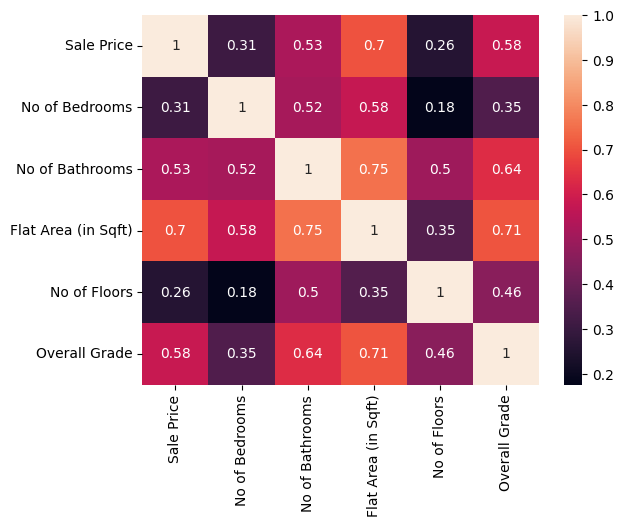

In [112]:
sns.heatmap(original_data_corr,annot=True)